### Task 4: Location-based Analysis

 Objective: Perform a geographical analysis of the
 restaurants in the dataset.
 
 Steps:
 Explore the latitude and longitude coordinates of
 the restaurants and visualize their distribution on a
 map.
 Group the restaurants by city or locality and
 analyze the concentration of restaurants in
 different areas.
 Calculate statistics such as the average ratings,
 cuisines, or price ranges by city or locality.
 Identify any interesting insights or patterns related
 to the locations of the restaurants.


Libraries and Data Loading

In [45]:
 !pip install folium


In [46]:
 !pip install geopandas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [48]:
# load dataframe
df = pd.read_csv('restaurant.csv', encoding='ISO-8859-1')

In [49]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [50]:
df.isnull().sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [51]:
df.describe()

,ï»¿Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [52]:
df.dropna(inplace=True)

 Check Latitude and Longitude Coordinates:
 
 Ensure that your dataset contains columns for latitude and longitude. These
 columns are crucial for plotting the restaurant locations on a map.

In [53]:
# Create a map centered at an average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()])

In [54]:
# Add restaurant markers to the map
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)
# Save the map to an HTML file
m.save('restaurants_map.html')

 Use the groupby function to group your data by city or locality. This will help you
 analyze the concentration of restaurants in different areas.

<Axes: xlabel='City'>

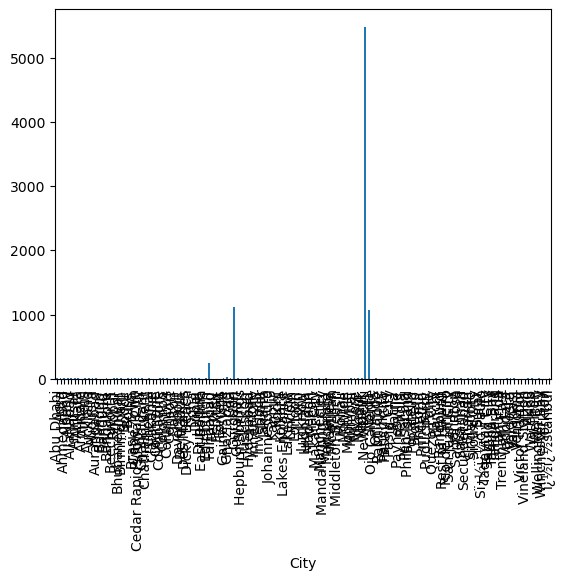

In [55]:
 # Group by city or locality
 city_group = df.groupby('City')['Restaurant Name'].count().reset_index()
 city_group.columns = ['City', 'Number of Restaurants']
 # Plot the distribution
 city_group.plot(kind='bar', x='City', y='Number of Restaurants', legend=False)

In [56]:
 # Average ratings by city
 avg_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()
 avg_ratings.columns = ['City', 'Average Rating']
 # Average price range by city
 avg_prices = df.groupby('City')['Price range'].mean().reset_index()
 avg_prices.columns = ['City', 'Average Price Range']

<Axes: title={'center': 'Average Ratings by City'}, xlabel='City'>

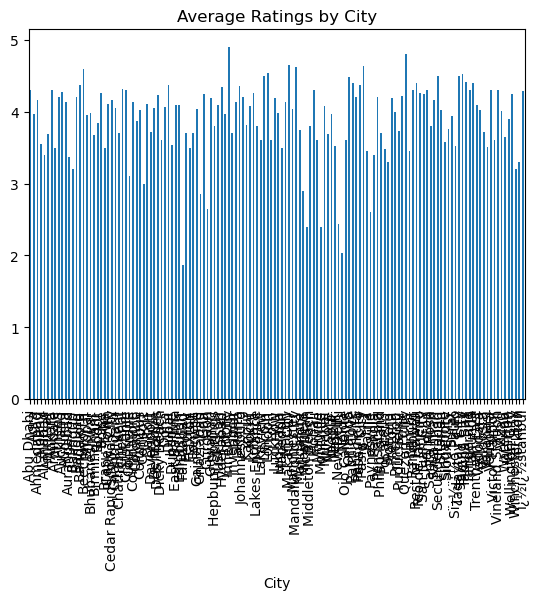

In [57]:
# Example visualization of average ratings
avg_ratings.plot(kind='bar', x='City', y='Average Rating', legend=False, title='Average Ratings by City')